In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('RTA Dataset.csv')

In [3]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [4]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
#checking for missing values

df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
#handling missing values

# Fill missing values in each column with its mode# Fill missing values in each column with its mode
# for column in df.columns:
#     df[column].fillna(df[column].mode()[0])

df = df.apply(lambda x: x.fillna(x.mode()[0]))



In [9]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [10]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Extract hours, minutes, and seconds into separate columns
df['h'] = df['Time'].dt.hour
df['m'] = df['Time'].dt.minute
df['s'] = df['Time'].dt.second


In [11]:
print(df[['Time', 'h', 'm', 's']].head())

                 Time   h  m  s
0 1900-01-01 17:02:00  17  2  0
1 1900-01-01 17:02:00  17  2  0
2 1900-01-01 17:02:00  17  2  0
3 1900-01-01 01:06:00   1  6  0
4 1900-01-01 01:06:00   1  6  0


In [12]:
df = df.drop(columns=['m','s'])
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,h
0,1900-01-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,17
1,1900-01-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,17
2,1900-01-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1900-01-01 16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,1900-01-01 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,1900-01-01 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,1900-01-01 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


In [13]:
day_list = []

for i in df['h']:
    if i < 5 or i > 18:
        day_list.append('Night')
    else:
        day_list.append('Day')

df['Day'] = day_list

df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,h,Day
0,1900-01-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,17,Day
1,1900-01-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,17,Day
2,1900-01-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,17,Day
3,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,Night
4,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,1,Night


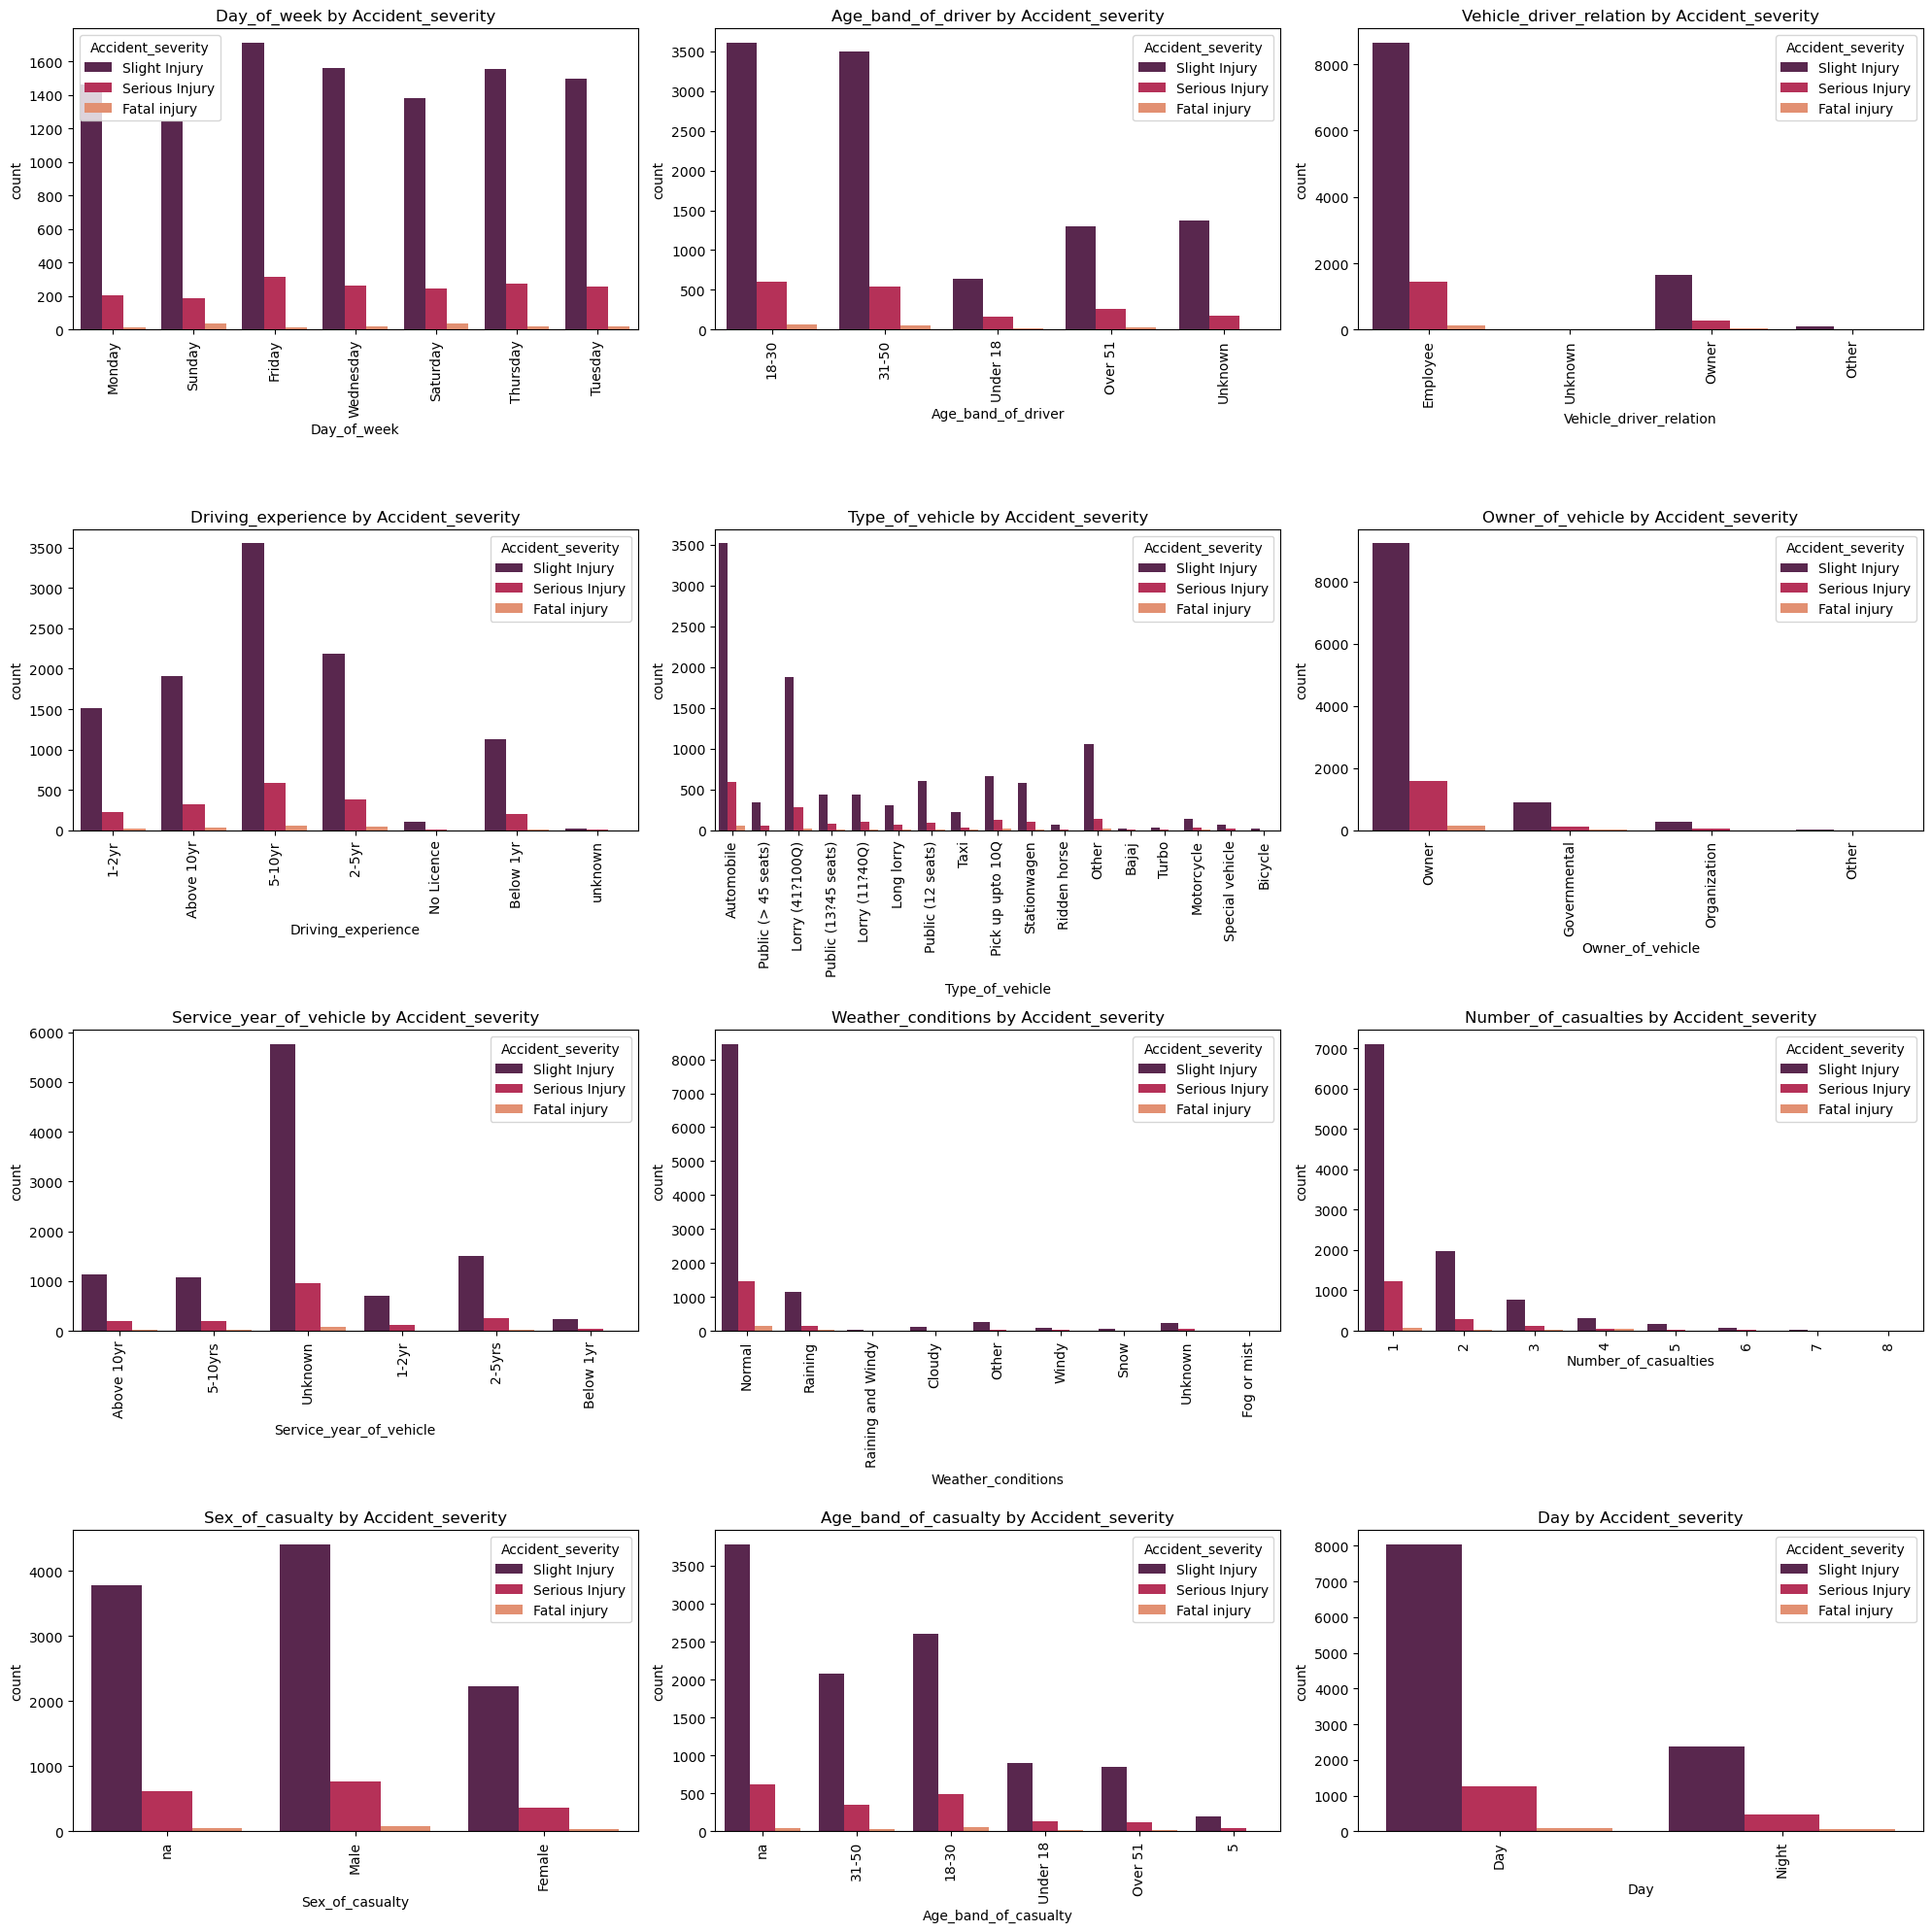

In [14]:
columns_to_plot = ['Day_of_week', 'Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 
                   'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle','Weather_conditions','Number_of_casualties','Sex_of_casualty','Age_band_of_casualty','Day']

# Create a figure with 3 rows and 4 columns
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

# Plot each column in the appropriate subplot
for i, col in enumerate(columns_to_plot):
    sns.countplot(x=col, hue="Accident_severity", data=df, palette='rocket', ax=axes[i])
    axes[i].set_title(f"{col} by Accident_severity")
    axes[i].tick_params(axis='x', rotation=90)

# Remove any empty subplots (if fewer than 12 plots)
for j in range(len(columns_to_plot), 12):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

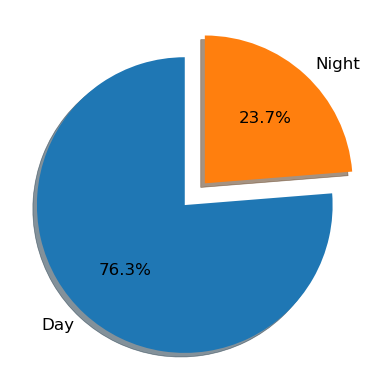

In [15]:
plt.pie(df['Day'].value_counts(), labels=df['Day'].unique(), autopct='%1.1f%%',
            startangle=90, wedgeprops={'linewidth': 0.5}, textprops={'fontsize': 12},
            explode=[0.1,0.1], shadow=True)
plt.show()

<Axes: xlabel='h', ylabel='count'>

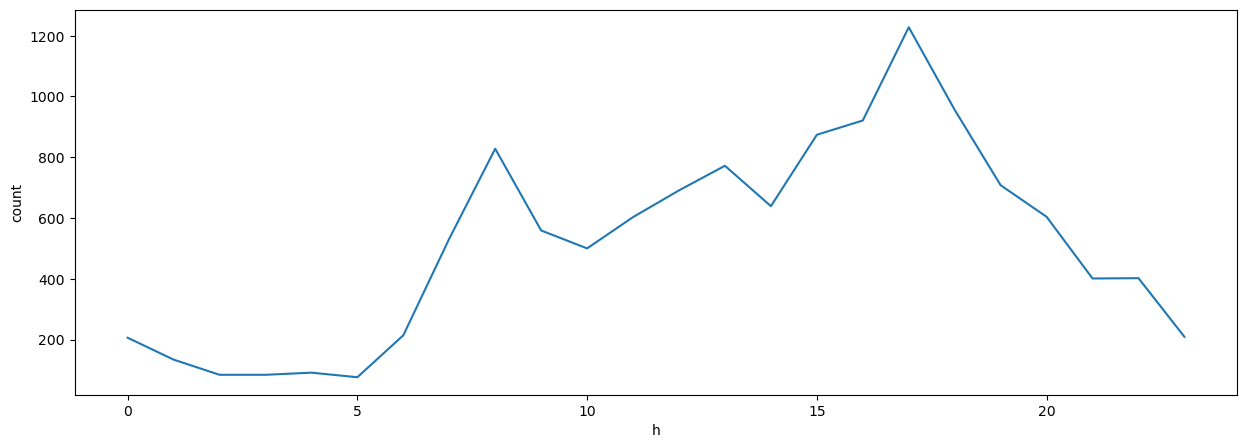

In [16]:
plt.figure(figsize=(15,5))
sns.lineplot(df['h'].value_counts())

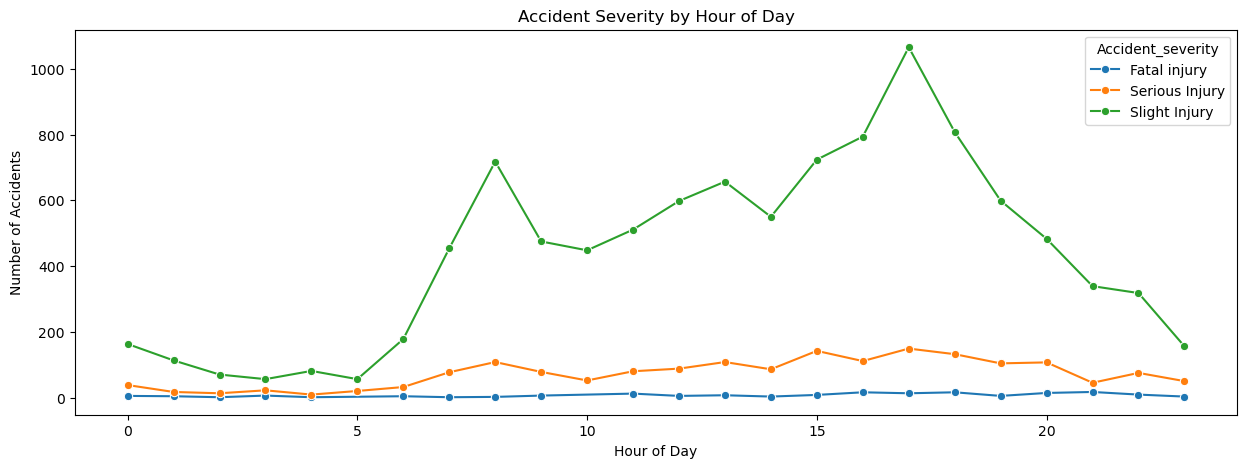

In [17]:
df_grouped = df.groupby(['h', 'Accident_severity']).size().reset_index(name='counts')

plt.figure(figsize=(15, 5))
sns.lineplot(x='h', y='counts', hue='Accident_severity', data=df_grouped, marker="o")

plt.title("Accident Severity by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns



In [19]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to all categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to avoid issues
    label_encoders[col] = le  # Store encoders for future decoding

    # Print encoding mapping
    mapping = dict(zip(le.classes_, range(len(le.classes_))))
    print("Label Encoding Mapping:", mapping)

Label Encoding Mapping: {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}
Label Encoding Mapping: {'18-30': 0, '31-50': 1, 'Over 51': 2, 'Under 18': 3, 'Unknown': 4}
Label Encoding Mapping: {'Female': 0, 'Male': 1, 'Unknown': 2}
Label Encoding Mapping: {'Above high school': 0, 'Elementary school': 1, 'High school': 2, 'Illiterate': 3, 'Junior high school': 4, 'Unknown': 5, 'Writing & reading': 6}
Label Encoding Mapping: {'Employee': 0, 'Other': 1, 'Owner': 2, 'Unknown': 3}
Label Encoding Mapping: {'1-2yr': 0, '2-5yr': 1, '5-10yr': 2, 'Above 10yr': 3, 'Below 1yr': 4, 'No Licence': 5, 'unknown': 6}
Label Encoding Mapping: {'Automobile': 0, 'Bajaj': 1, 'Bicycle': 2, 'Long lorry': 3, 'Lorry (11?40Q)': 4, 'Lorry (41?100Q)': 5, 'Motorcycle': 6, 'Other': 7, 'Pick up upto 10Q': 8, 'Public (12 seats)': 9, 'Public (13?45 seats)': 10, 'Public (> 45 seats)': 11, 'Ridden horse': 12, 'Special vehicle': 13, 'Stationwagen': 14, 'Taxi': 15, 'Turbo': 16}

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  int32         
 2   Age_band_of_driver           12316 non-null  int32         
 3   Sex_of_driver                12316 non-null  int32         
 4   Educational_level            12316 non-null  int32         
 5   Vehicle_driver_relation      12316 non-null  int32         
 6   Driving_experience           12316 non-null  int32         
 7   Type_of_vehicle              12316 non-null  int32         
 8   Owner_of_vehicle             12316 non-null  int32         
 9   Service_year_of_vehicle      12316 non-null  int32         
 10  Defect_of_vehicle            12316 non-null  int32         
 11  Area_accident_occured        12316 non-nu

In [21]:
for col in df.columns:
    
    print(f'{col} {df[col].unique()}')

Time <DatetimeArray>
['1900-01-01 17:02:00', '1900-01-01 01:06:00', '1900-01-01 14:15:00',
 '1900-01-01 17:30:00', '1900-01-01 17:20:00', '1900-01-01 14:40:00',
 '1900-01-01 17:45:00', '1900-01-01 22:45:00', '1900-01-01 08:20:00',
 '1900-01-01 15:10:00',
 ...
 '1900-01-01 23:55:00', '1900-01-01 15:58:00', '1900-01-01 10:26:00',
 '1900-01-01 05:53:00', '1900-01-01 08:34:00', '1900-01-01 22:11:00',
 '1900-01-01 07:02:00', '1900-01-01 07:24:00', '1900-01-01 19:18:00',
 '1900-01-01 02:47:00']
Length: 1074, dtype: datetime64[ns]
Day_of_week [1 3 0 6 2 4 5]
Age_band_of_driver [0 1 3 2 4]
Sex_of_driver [1 0 2]
Educational_level [0 4 1 2 5 3 6]
Vehicle_driver_relation [0 3 2 1]
Driving_experience [0 3 2 1 5 4 6]
Type_of_vehicle [ 0 11  5 10  4  3  9 15  8 14 12  7  1 16  6 13  2]
Owner_of_vehicle [3 0 1 2]
Service_year_of_vehicle [3 2 5 0 1 4]
Defect_of_vehicle [2 1 0]
Area_accident_occured [ 9  6  1  4  7  2  0 13 10  5  3 12 11  8]
Lanes_or_Medians [2 4 6 0 1 3 5]
Road_allignment [5 6 0 8 1 

In [22]:
x = df.drop('Accident_severity' , axis =1)

In [23]:
x.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'h', 'Day'],
      dtype='object')

In [24]:
y = df['Accident_severity']

In [25]:
x = x.drop('Time' , axis = 1)

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Day_of_week                  12316 non-null  int32
 1   Age_band_of_driver           12316 non-null  int32
 2   Sex_of_driver                12316 non-null  int32
 3   Educational_level            12316 non-null  int32
 4   Vehicle_driver_relation      12316 non-null  int32
 5   Driving_experience           12316 non-null  int32
 6   Type_of_vehicle              12316 non-null  int32
 7   Owner_of_vehicle             12316 non-null  int32
 8   Service_year_of_vehicle      12316 non-null  int32
 9   Defect_of_vehicle            12316 non-null  int32
 10  Area_accident_occured        12316 non-null  int32
 11  Lanes_or_Medians             12316 non-null  int32
 12  Road_allignment              12316 non-null  int32
 13  Types_of_Junction            12316 non-null  i

In [27]:

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.2 , random_state = 1)

from sklearn.feature_selection import SelectKBest, f_classif
# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=15)
x_new = selector.fit_transform(x_train, y_train)

# Get selected feature names
selected_features = x_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Age_band_of_driver', 'Driving_experience', 'Area_accident_occured',
       'Lanes_or_Medians', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Casualty_class', 'Age_band_of_casualty',
       'Fitness_of_casuality', 'Pedestrian_movement', 'h', 'Day'],
      dtype='object')


In [28]:
x = df[selected_features]

In [29]:
x = x.drop(['Casualty_class', 'Fitness_of_casuality','Number_of_vehicles_involved' , 'Driving_experience','Area_accident_occured','Lanes_or_Medians', ] , axis = 1)


In [30]:
x.columns

Index(['Age_band_of_driver', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_casualties', 'Age_band_of_casualty',
       'Pedestrian_movement', 'h', 'Day'],
      dtype='object')

In [31]:
x['Type_of_vehicle'] = df['Type_of_vehicle']
x['Gender'] = df['Sex_of_driver']
x['Road_surface_type'] = df['Road_surface_type']

In [32]:
x['Cause_of_accident'] = df['Cause_of_accident']

In [33]:
x.columns

Index(['Age_band_of_driver', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_casualties', 'Age_band_of_casualty',
       'Pedestrian_movement', 'h', 'Day', 'Type_of_vehicle', 'Gender',
       'Road_surface_type', 'Cause_of_accident'],
      dtype='object')

In [34]:
x = x.drop( 'Age_band_of_casualty', axis = 1)

In [35]:
x.columns

Index(['Age_band_of_driver', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_casualties', 'Pedestrian_movement', 'h',
       'Day', 'Type_of_vehicle', 'Gender', 'Road_surface_type',
       'Cause_of_accident'],
      dtype='object')

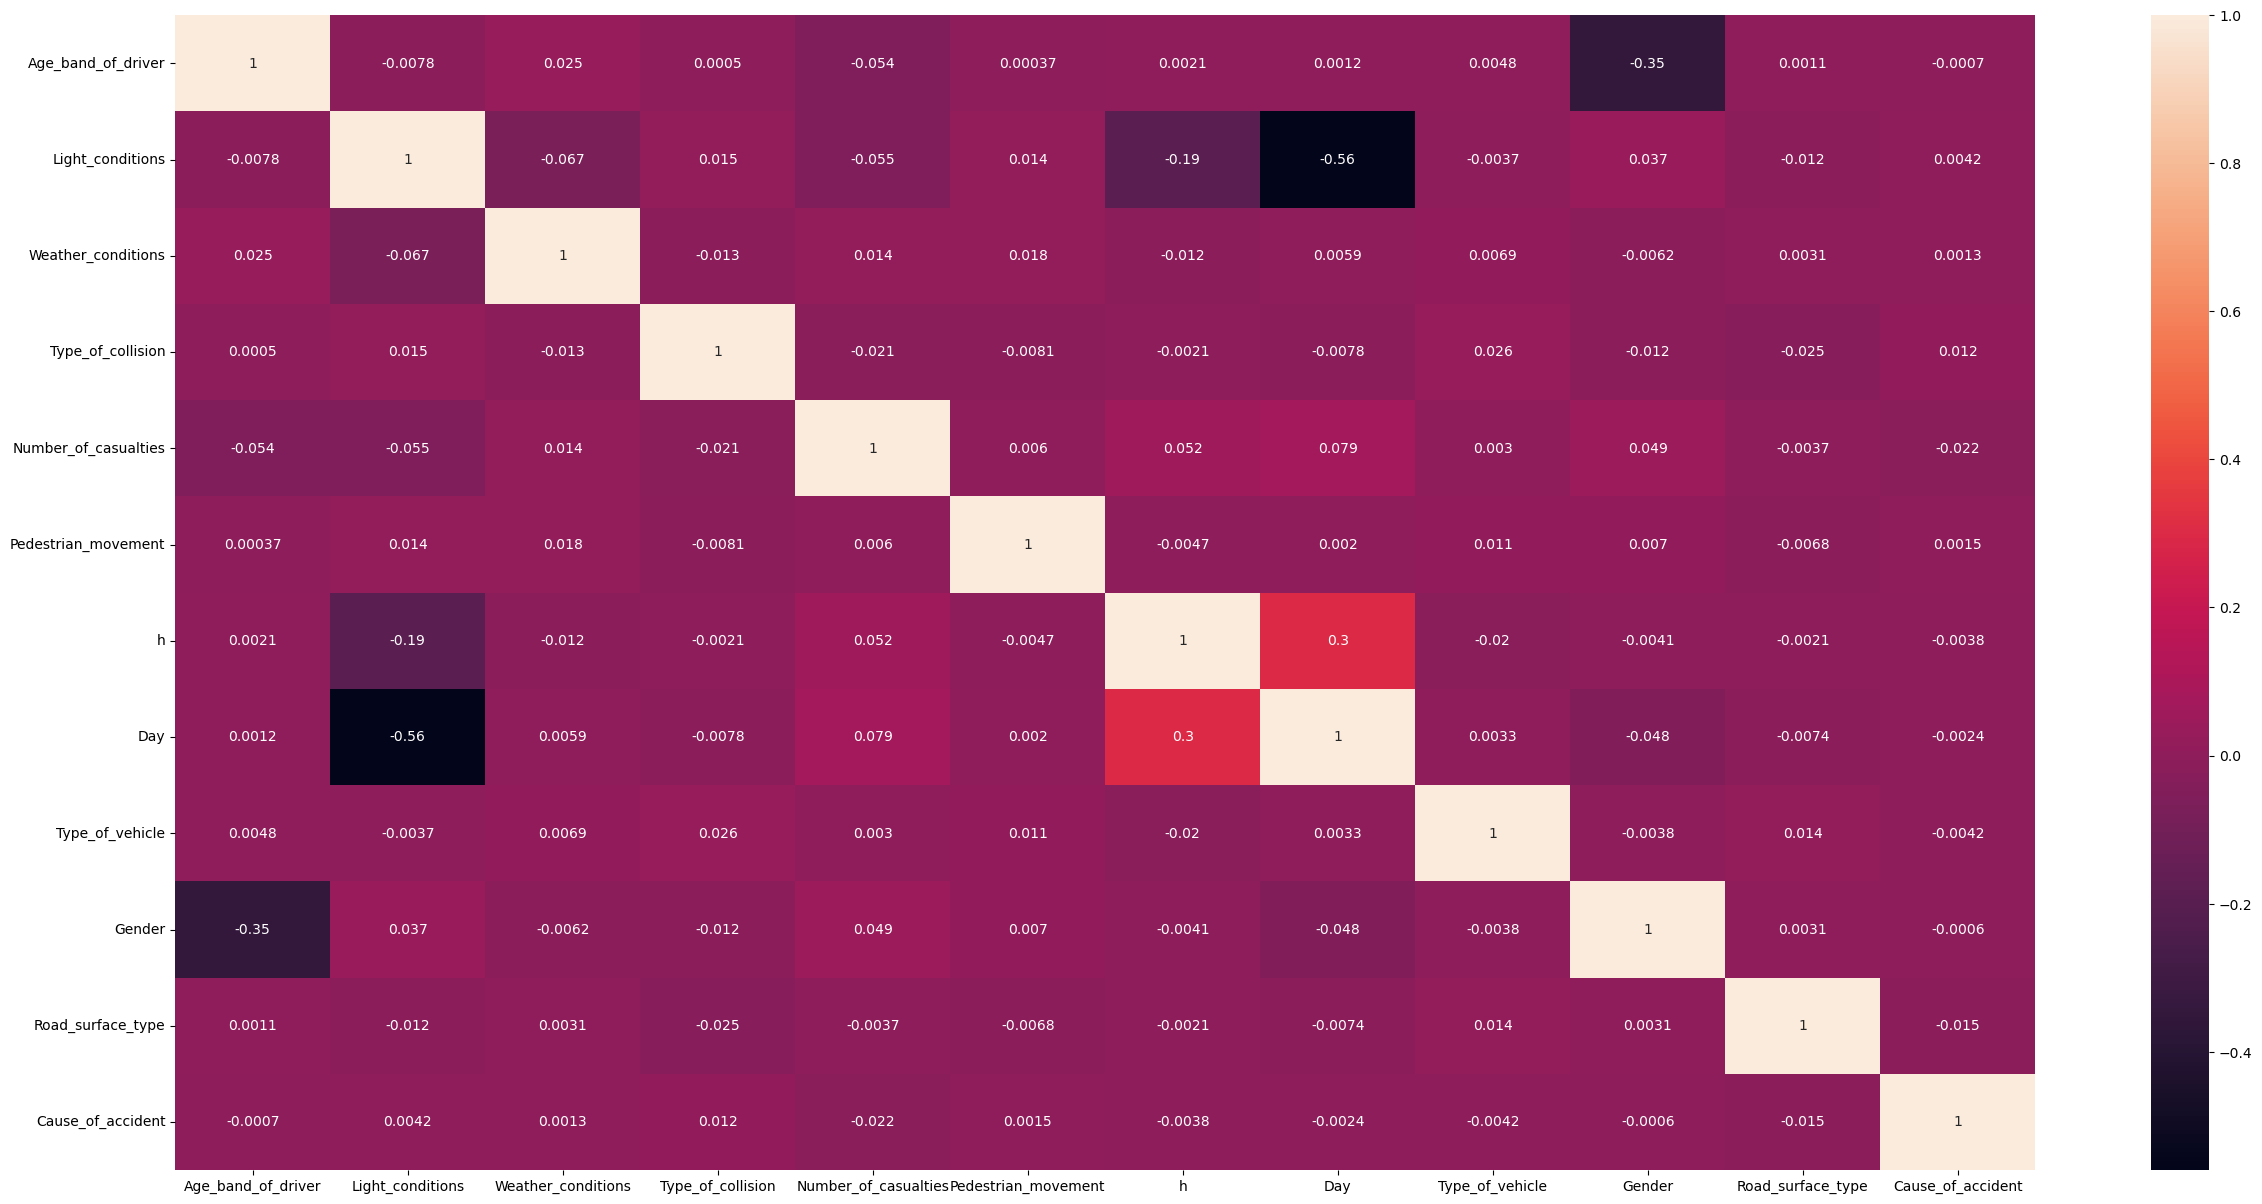

In [36]:
plt.figure(figsize=(30,15))
sns.heatmap(x.corr(),annot=True)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 1)

In [38]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [39]:
train_score = DTC.score(x_train,y_train)
test_score = DTC.score(x_test,y_test)
print('train_score : ',train_score)
print('test_score : ',test_score)

train_score :  0.8453775664076093
test_score :  0.8557510148849797


In [40]:
DTC.feature_importances_

array([0.06093099, 0.11716419, 0.08230252, 0.03689644, 0.25036958,
       0.01663056, 0.35952005, 0.        , 0.00909098, 0.        ,
       0.        , 0.06709469])

<Axes: >

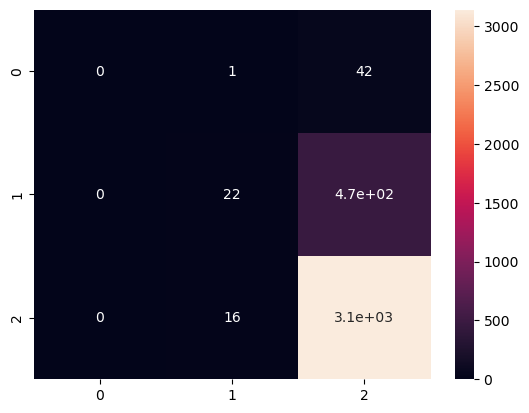

In [41]:
y_pred = DTC.predict(x_test)
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM,annot=True)

In [42]:
accuracy_score(y_test,y_pred)

0.8557510148849797

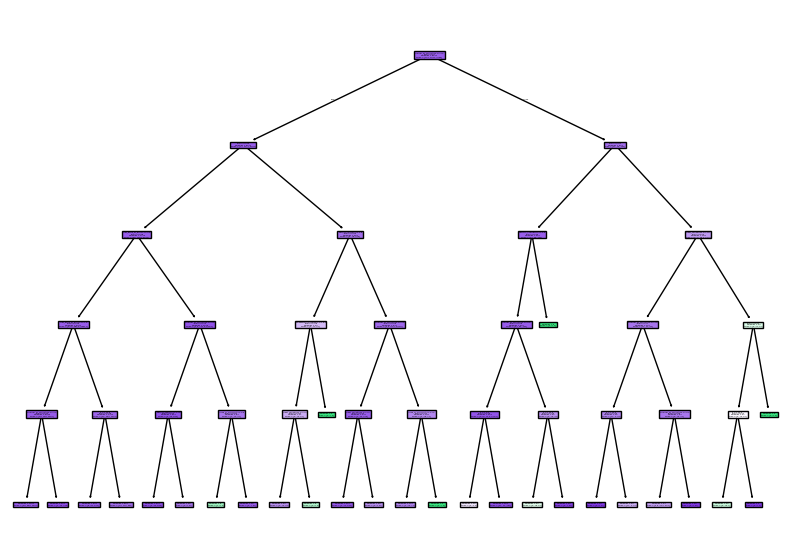

In [43]:
# Plot the decision tree
plt.figure(figsize=(10, 7))
plot_tree(DTC, filled=True, feature_names=x_train.columns.tolist())
plt.show()

In [44]:
accuracy_score(y_test,y_pred)

0.8557510148849797

In [45]:
import pickle
pickle.dump(DTC , open('model.pkl' , 'wb'))